In [2]:
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio import pairwise2
from Levenshtein import distance
from collections import Counter
from Bio.SeqUtils import MeltingTemp as mt, gc_fraction
from Bio.SeqUtils import molecular_weight as mw
from Bio.pairwise2 import format_alignment

In [3]:
x = SeqIO.read("x.fasta","fasta")

print(x.id)
print(x.description)
print(x.seq)

XM_006779407.2
XM_006779407.2 PREDICTED: Myotis davidii seryl-tRNA synthetase (SARS), mRNA
ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGNNNNNNNNNNNNNNNNNNCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTT

In [7]:
SeqX = x.seq.replace("N","")

print("X =", SeqX)

X = ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACGCGTCACCACATGACAACAAG

In [8]:
y = SeqIO.read("y.fasta","fasta")

print(y.id)
print(y.description)
print(y.seq)

OV986001.1
OV986001.1 Pseudomonas fluorescens SBW25 genome assembly, chromosome: 1
GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCC

In [9]:
SeqY = y.seq

print("Y =", SeqY)

Y = GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTAGAGCCGCCGGAG

In [10]:
lenX = len(SeqX)
lenY = len(SeqY)

print ("Length of X =", lenX)
print ("Length of Y =", lenY)

Length of X = 1865
Length of Y = 1050


In [11]:
CGC_inX = SeqX.find("CGC")
CGC_inY = SeqY.find("CGC")

print("First CGC in X appears in index =", CGC_inX)
print("First CGC in Y appears in index =", CGC_inY)

First CGC in X appears in index = 51
First CGC in Y appears in index = 39


In [12]:
X_slicing = SeqX[:10:]+SeqX[-5::1]
Y_slicing = SeqY[:20:]+SeqY[-3::1]

print(X_slicing)
print(Y_slicing)

ATGGTGTTGGAGTCA
GTGTCAGTGGAACTTTGGCAGAC


In [14]:
Z = X_slicing + Y_slicing
SeqZ = Z[::-1]

print("Sequence Z =", SeqZ)

Sequence Z = CAGACGGTTTCAAGGTGACTGTGACTGAGGTTGTGGTA


In [15]:
freqA_inZ = SeqZ.count("A")
freqC_inZ = SeqZ.count("C")

print(freqA_inZ)
print(freqC_inZ)

8
5


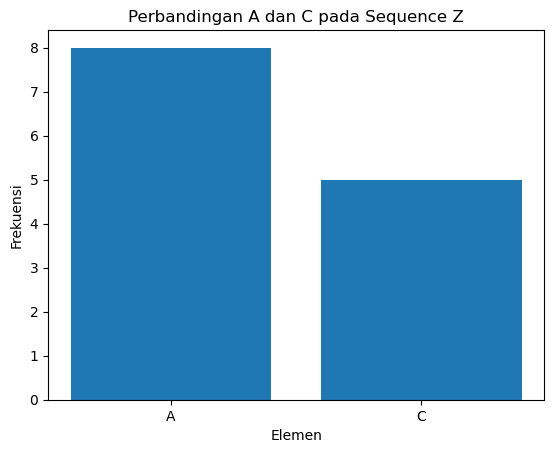

In [17]:
plt.bar(['A', 'C'], [freqA_inZ, freqC_inZ])
plt.xlabel("Elemen")
plt.ylabel("Frekuensi")
plt.title("Perbandingan A dan C pada Sequence Z")
plt.show()

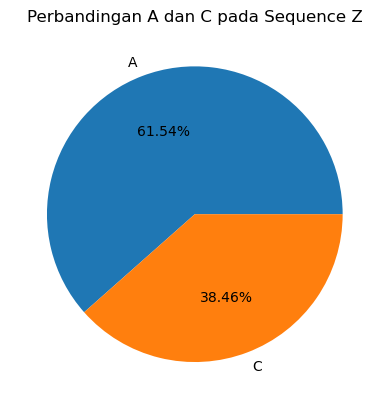

In [20]:
plt.pie([freqA_inZ, freqC_inZ], labels = ["A" , "C"], autopct= "%.2lf%%")
plt.title("Perbandingan A dan C pada Sequence Z")
plt.show()

In [32]:
gc_inZ = gc_fraction(SeqZ) * 100
at_inZ = 100 - gc_fraction(SeqZ) * 100

print("GC in Seq Z =", gc_inZ, "%")
print("AT in Seq Z =", at_inZ, "%")

GC in Seq Z = 50.0 %
AT in Seq Z = 50.0 %


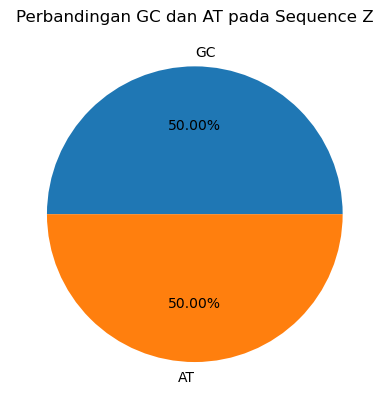

In [34]:
plt.pie([gc_inZ, at_inZ], labels = ["GC", "AT"] , autopct= "%.2lf%%")
plt.title("Perbandingan GC dan AT pada Sequence Z")
plt.show()

In [23]:
mt_inZ = mt.Tm_Wallace(SeqZ)
print("Melting Temp in Seq Z =", mt_inZ)

mw_inZ = mw(SeqZ)
print("Molecular Weight in Seq Z =", mw_inZ)

Melting Temp in Seq Z = 114.0
Molecular Weight in Seq Z = 11924.584100000002


In [24]:
mRNA = SeqZ.transcribe()
a_acids = SeqZ.translate()
a_acids2 = mRNA.translate()

print ("mRNA Sequence =", mRNA)
print ("Amino Acids   =", a_acids)
print ("Amino Acids 2 =", a_acids2)

mRNA Sequence = CAGACGGUUUCAAGGUGACUGUGACUGAGGUUGUGGUA
Amino Acids   = QTVSR*L*LRLW
Amino Acids 2 = QTVSR*L*LRLW


/Users/macbookdanda/anaconda3/lib/python3.11/site-packages/Bio/Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [26]:
local_alignment = pairwise2.align.localxx(SeqX, SeqY)

for a in local_alignment:
    print(format_alignment(*a))

6 GTTGGATC--TGGA-CTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTG-GCGAAAATGCAGATTTCA-GACCG-A-CAACTTG-AACAAGC-TGAAGAA-CCTATG-CAGCAAGACAATTGGAG-AGAAAATGAA--GAAAAAAGAGCCAGTGGGAAATGATGAGTCC-ATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACA-CTTTAGCTAACCTGAAAGT-GTCACA---GATCAAAAAACTC-CGACTCC---TCAT-CGACGAAGCCAT-CCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATA-GCGGTTT-GA-GAACCTC-CGCG-A--G-C-T-GCATCCCTCGGTGCC-CATCAG-T-A--ACGATGAGG-ATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACT-GCACCGTCAAGAAGAAGTACTCGCACGTG-GACCTGGTGGTGATGGTCGAT-G-GCT--TTGAAGGCGAAAAAGGGGTCGTGG-TGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTG-GTGTTCCTGGAACAGGCGC--TCAT-CCAGTACGC-CCTTCGCACCTTGGGAAGTCGGGGCTACA-TTCCCATTTACACCC-CGTTTTTCATGAG-GAAGGAGGTCATGCAGGAGG-TGGCACAGCTCAGCCAGTTTGA-TGAAGAGCTTTACAAGGT-GATTGGCAAAGGCAGT-GAAA-AGTCTGA-CGACAACTCCTACGATGAGAAATACCTGAT-TGCCAC-CTCCG-AGCA-GCCCATCGC-TGCTC-TCCA-CCGAGATG-AGTG-GCTACGGCCAG---AGGATTTGCCCATCAAGTATGCTGGCCTGTC-CACCT-GCTTT-CG-CCAGGAGGTGGGCTCCCACGGCCGG-GACAC

In [27]:
global_alignemnt = pairwise2.align.globalxx(SeqY, SeqZ)

for b in global_alignemnt :
    print(format_alignment(*b))

GTGTCAGTGGAACTTTGGCAGCAGTGCGTGGAGCTTTTGCGCGATGAGCTGCCTGCCCAGCAATTCAACACCTGGATCCGTCCACTACAGGTCGAAGCCGAAGGCGACGAGTTGCGTGTTTACGCGCCCAATCGTTTTGTTCTCGACTGGGTCAACGAGAAGTACCTGAGCCGCGTGCTCGAATTGCTCGATGAACACGGCAACGGCCTCGCACCCGTGCTCTCCTTATTAATAGGCAGCAAACGTAGCTCCGCACCTCGTGCTGCGCCGAACGCGCCATTGGCCGCTGCTGCGTCGCAAGCCCAGGCGGCACCGGTTGCCAGTACACCTGCACCGGCTCCTTCCAAATCGTCTGCGAAGAAAAATGCAGCCGAGAATGAAGAACCGTCGCGCGATAGCTTCGACCCGATGGCCGGTGCCAGCTCCCAGCAAGCCCCGATCCGTGCCGAACAGCGCACCGTTCAGGTTGAAGGTGCGCTCAAGCACACCAGCTACCTGAACCGCACGTTCACGTTCGAGAATTTCGTCGAAGGTAAATCCAACCAGCTGGCTCGTGCAGCCGCCTGGCAGGTCGCCGACAACCCCAAGCACGGTTACAACCCTCTCTTCCTTTATGGTGGCGTCGGCTTGGGTAAGACTCACTTGATGCACGCTGTGGGTAACCACCTATTAAAGAAGAACCCGAATGCCAAGGTCGTGTACCTGCACTCGGAGCGCTTCGTGGCTGACATGGTCAAGGCCCTGCAGCTCAATGCCATCAATGAATTCAAGCGTTTCTACCGCTCGGTTGATGCGTTGCTGATCGATGACATTCAATTCTTTGCCCGTAAAGAGCGTTCCCAGGAAGAGTTTTTCCATACCTTCAACGCCCTGCTCGAAGGTGGCCAGCAGGTCATCTTGACCAGTGACCGTTATCCGAAAGAGATCGAAGGTCTGGAAGAACGCCTGAAATCGCGTTTCGGCTGGGGCCTGACTGTTGCAGTAGAGCCGCCGGAGCTCG

In [28]:
Levenshtein = distance (SeqX, SeqY)
print ("Levenshtein distance =",  Levenshtein)

Levenshtein distance = 1028


In [29]:
def function (SeqX, SeqY):
    h =[]
    for x,y in zip (SeqX, SeqY):
        if (x != y):
            h.append((x,y))
    return len(h)

Hamming = function(SeqX, SeqY)
print ("Hamming =", Hamming)

Hamming = 755


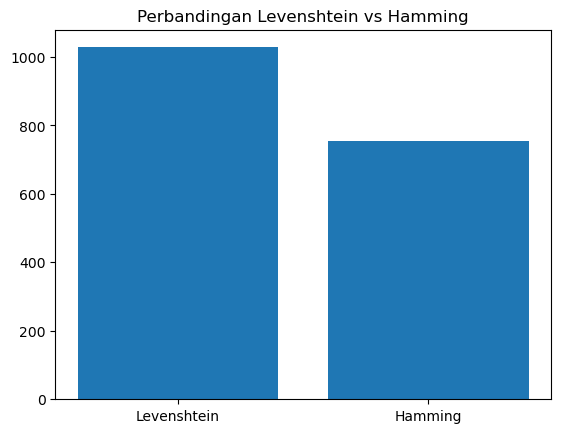

In [30]:
plt.bar(["Levenshtein", "Hamming"], [Levenshtein, Hamming])
plt.title("Perbandingan Levenshtein vs Hamming")
plt.show()